In [2]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('datasets/Data.csv')
print(dataset)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

print('done')

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]
done


In [3]:
# check for empty cells

def get_empty_cells(df: pd.DataFrame) -> pd.DataFrame:
  df2 = df.replace('', np.nan)
  empty_cell_indices = np.where(df2.isna())
  return empty_cell_indices

# %timeit get_empty_cells(part)
# %timeit np.where(part.apply(lambda x: x == ''))
# empty_cells = get_empty_cells(X)
print(get_empty_cells(X))

print("done")

(array([], dtype=int64), array([], dtype=int64))
done


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

print(x_train)
print(x_test)

print("done")

         AT      V       AP     RH
9061   6.61  38.91  1015.77  92.31
6937  22.72  65.61  1014.64  70.53
5631  10.06  39.61  1018.22  70.22
6218  27.53  67.83  1009.40  53.73
1362  23.89  48.41  1010.48  62.31
...     ...    ...      ...    ...
2895  26.92  62.44  1011.09  70.80
7813  20.90  67.71  1007.16  59.02
905   18.59  39.54  1008.56  68.61
5192  22.96  45.01  1012.21  50.81
235   20.50  49.69  1009.60  70.81

[7654 rows x 4 columns]
         AT      V       AP     RH
5014  17.93  44.63  1003.54  87.41
6947  16.34  42.28  1008.08  52.80
9230  25.97  70.32  1007.48  57.01
4290   6.77  38.18  1017.80  81.13
6477   8.64  39.69  1001.57  98.27
...     ...    ...      ...    ...
2355  23.96  60.95  1015.01  65.24
3382  25.34  49.50  1013.25  50.80
2539  10.68  38.38  1020.79  72.33
9477  34.03  73.56  1006.49  51.07
9069  15.28  44.58  1016.45  83.07

[1914 rows x 4 columns]
done


In [5]:
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler()
x_train_scaled = scalerX.fit_transform(x_train)
print(x_train_scaled)

x_test_scaled = scalerX.transform(x_test)
print(x_test_scaled)

print("done")

[[-1.75440309 -1.21216858  0.42112637  1.3027435 ]
 [ 0.41388954  0.88854693  0.23226259 -0.1942825 ]
 [-1.29005737 -1.15709364  0.83060976 -0.21559003]
 ...
 [-0.1419794  -1.16260113 -0.78392477 -0.32625174]
 [ 0.44619185 -0.73222983 -0.17387808 -1.54971652]
 [ 0.11509316 -0.36401453 -0.61010325 -0.17503699]]
[[-0.23081075 -0.76212765 -1.62294789  0.96594702]
 [-0.44481356 -0.94702209 -0.86415009 -1.4129359 ]
 [ 0.85131667  1.25912259 -0.96443174 -1.12356586]
 ...
 [-1.20660974 -1.25386817  1.26014949 -0.07056134]
 [ 1.93613595  1.51404088 -1.12989646 -1.53184568]
 [-0.58748211 -0.76606158  0.5347789   0.66764156]]
done


done


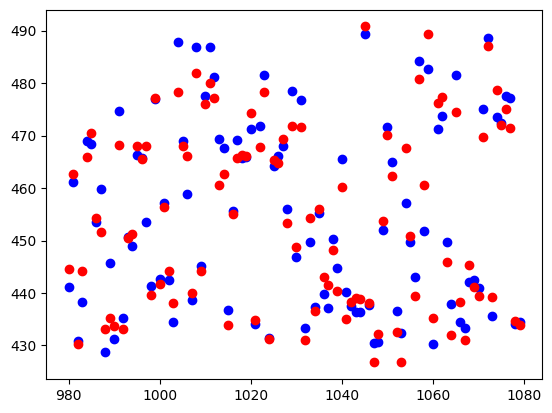

In [10]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plot

regressor = LinearRegression()
regressor.fit(x_train_scaled, y_train)
predicted1 = regressor.predict(x_test_scaled)

x_ticks = range(0, x_test_scaled[:, 0].size)
plot_limit = 100
plot_start = 980
plot_end = plot_start + plot_limit
plot.scatter(x_ticks[plot_start:plot_end], y_test[plot_start:plot_end], color='blue')
plot.scatter(x_ticks[plot_start:plot_end], predicted1[plot_start:plot_end], color='red')



print("done")

In [14]:
from sklearn.metrics import r2_score

score1 = r2_score(y_test, predicted1)
print(score1)

print("done")

0.9321860060402447
done


In [21]:
scalerY = StandardScaler()
y_train_scaled = scalerY.fit_transform(y_train.values.reshape(-1, 1))

regressor_for_scaled_target = LinearRegression()
regressor_for_scaled_target.fit(x_train_scaled, y_train_scaled)

predicted2 = regressor_for_scaled_target.predict(x_test_scaled)
predicted2_unscaled = scalerY.inverse_transform(predicted2)

score2 = r2_score(y_test, predicted2_unscaled)
print(score2)

print("done")

0.9321860060402446
done


In [ ]:


print("done")